In [2]:
import healpy as hp
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib notebook
from astropy.io import fits

import sys
import matplotlib
matplotlib.use("agg")

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1403: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
m = hp.read_map('../dst/dst_out_ch1-10_34_06-15_56_00_out_256/destriped.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
hdu = fits.PrimaryHDU()
hdu.header 

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [3]:
hp.mollview??

<IPython.core.display.Javascript object>


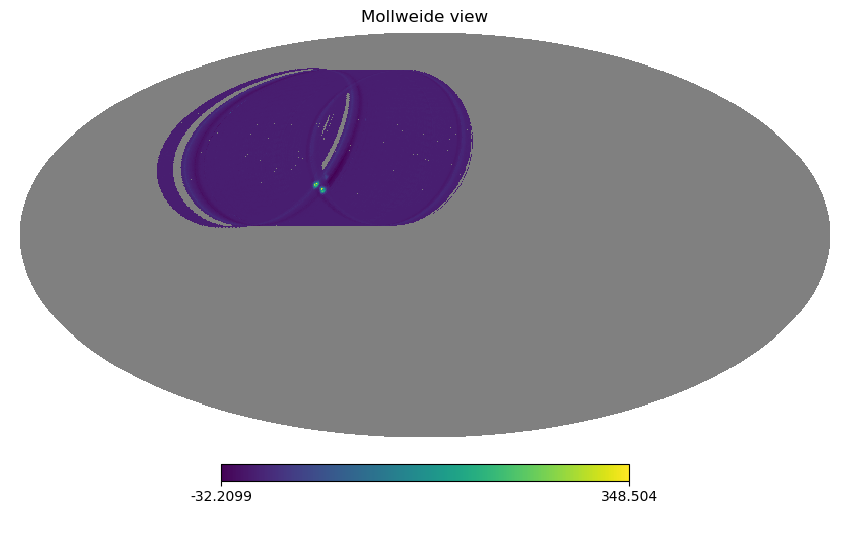

In [4]:
hp.mollview(m)
plt.show()

<IPython.core.display.Javascript object>


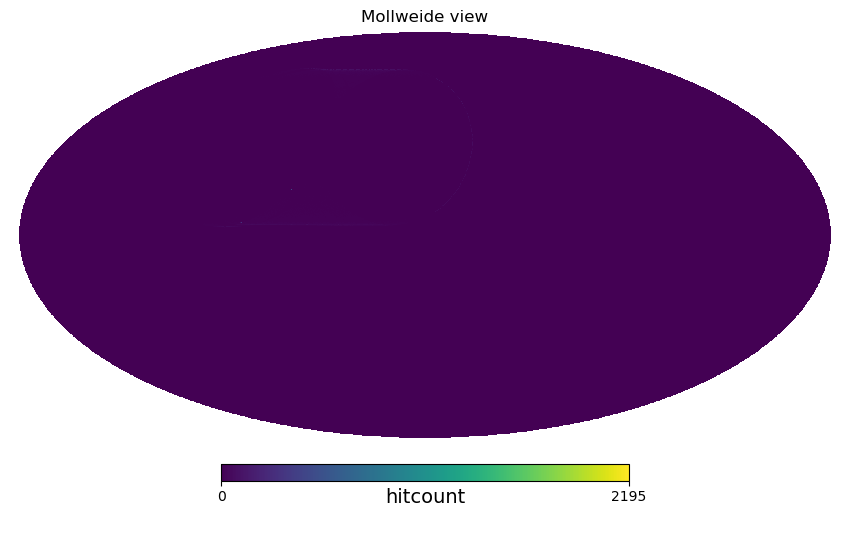

<IPython.core.display.Javascript object>


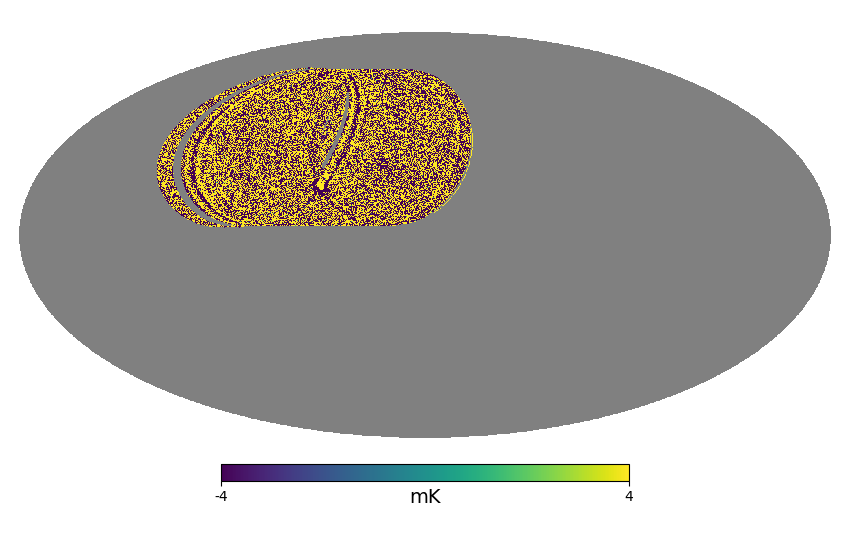

<IPython.core.display.Javascript object>


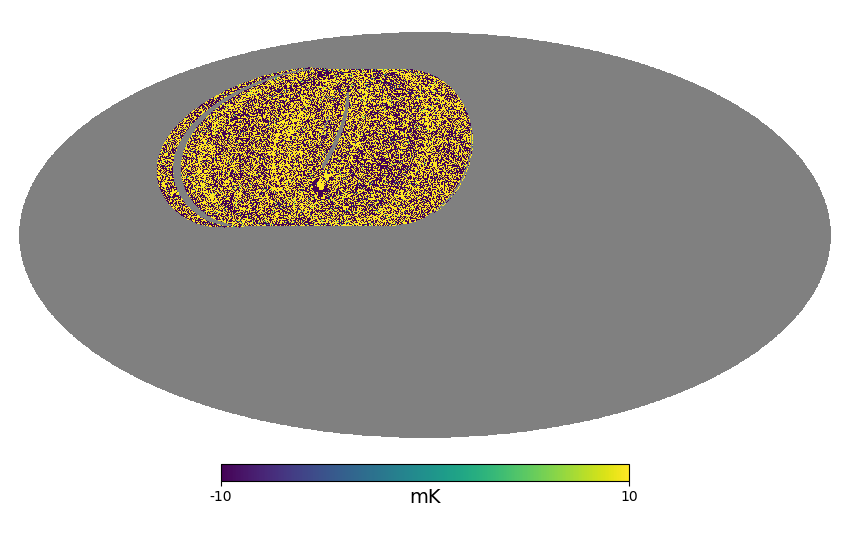

In [13]:
lim = { '': {'bin':20, 'destriped':20, 'baselines':10, 'filtbin':1},
        'Q':{'bin':500, 'destriped':4, 'baselines':500, 'filtbin':10} }
lim['U'] = lim['Q']
smooth = False
maps = {}
folder = '../dst/dst_out_ch1-10_34_06-15_56_00_out_256/'
hits = np.array(np.memmap(folder + "hits.bin",dtype=np.double))
hp.write_map(folder + "hits.fits", hits)
comps = ['Q']
binned = [hp.ma(np.array(np.memmap(folder + "binned%s.bin" % comp, dtype=np.double))) for comp in comps]
m = [hp.ma(np.array(np.memmap(folder + "map%s.bin" % comp, dtype=np.double))) for comp in comps]
baselines = [bb-mm for bb,mm in zip(binned, m)]
mapcombs = [(m, 'destriped')]

try:
    binnedf = [binned[0].copy()]
    binnedf += [hp.ma(np.array(np.memmap(folder + "binnedf%s.bin" % comp, dtype=np.double))) for comp in comps[1:]]
    mapcombs.append((binnedf, 'filtbin'))
except:
    pass

hp.mollview(hits, unit='hitcount',xsize=2000)
#plt.savefig(folder + "hits.png")

for iqumap, name in mapcombs:
    for comp, what in zip(comps, iqumap):
        l = lim[comp][name]
        what -= what.mean()
        if comp == '':
            what *=-1
        if smooth:
            whatsm = hp.ma(hp.smoothing(what, fwhm=np.radians(40/60.)))
            whatsm.mask = what.mask
            what = whatsm
            l /= 2
        maps[comp] = what
        hp.mollview((what*1e3), title='', min=-l,max=l, unit='mK',title="",xsize=2000)
        plt.show()
        #plt.savefig(folder + "%s%s.png" % (name, comp))

    #hp.write_map(folder + "%s.fits" % (name), iqumap)